In [1]:
#############################################################
# Compile `main.cu` to `file.exe`
# Commented out because we don't want to run it all the time
#############################################################
!nvcc -w functions.cu main.cu -o file

functions.cu
tmpxft_000095a0_00000000-10_functions.cudafe1.cpp
main.cu
tmpxft_000095a0_00000000-14_main.cudafe1.cpp
   Creating library file.lib and object file.exp


In [13]:
#############################################################
# Load python dependencies
# If package cannot be resolved from pylance, reload the interpreter
#############################################################
import numpy as np
import matplotlib.pyplot as plt
import utils

# Generate detuning
todo: distribution functions
read into detuning.dat

In [3]:
#############################################################
# Generate and write detuning data to file
#############################################################
# Write 1D numpy array to file
detuning_values_1d = utils.gen_same_pop(21, 200, False)
print("Detuning data:", detuning_values_1d)
np.savetxt("Detuning.dat", detuning_values_1d, delimiter="\t")

# Example: write 2D numpy array to file
# values_2d = np.array([
#     [10.0, 20.0, 40.0],
#     [10.0, 20.0, 50.0],
#     [10.0, 20.0, 60.0]
# ])
# np.savetxt("values_2d.dat", values_2d, delimiter="\t")

Detuning data: [-200.         -147.77653607 -100.99701502  -63.46210157  -36.48448789
  -19.11614091   -9.10005278   -3.92613145   -1.53215223   -0.53995921
    0.            0.53995921    1.53215223    3.92613145    9.10005278
   19.11614091   36.48448789   63.46210157  100.99701502  147.77653607
  200.        ]


# Run simulation

To run a single system, use terminal: 

         k  n_tot theta,phi g gamma chi kap t_end t_num handle

file.exe 20 100000 0.5 0.0 1.6 0.0 0.0 160 0.5 600000 k20N5_0.5_0_kappa160

## Suggested file naming convention:
k{num_ens}N{order of magnitude of n_total}_{theta_phi}_{other params}

E.g., k5N5_1_0_kappa160

The below block of code is useful for running multiple jobs

In [2]:
num_ens_range = [2]
max_det_range = [200]
sym_range = [True, False]
N_total_range = [10000]
theta_0_range = [0.5]
phi_0_range = [0.0]
coup_a_0_range = [1.6]
gamma_a_0_range = [0.0]
chi_a_0_range = [0.0]
kappa_c_0_range = [160.0]
t_max_range = [0.5]
t_num_range = [60000]
det_dict = {}
handle_list = []

runs = 0
for num_ens in num_ens_range:
    for max_det in max_det_range:
        for sym in sym_range:
            detuning_values_1d = utils.gen_same_pop(num_ens, max_det, sym)
            FWHM = detuning_values_1d[int(num_ens/2)]
            np.savetxt(f"Detuning.dat", detuning_values_1d, delimiter="\t")
            for N_total in N_total_range:
                for theta_0 in theta_0_range:
                    for phi_0 in phi_0_range:
                        for coup_a_0 in coup_a_0_range:
                            for gamma_a_0 in gamma_a_0_range:
                                for chi_a_0 in chi_a_0_range:
                                    for kappa_c_0 in kappa_c_0_range:
                                        for t_max in t_max_range:
                                            for t_num in t_num_range:
                                                runs += 1
                                                params = f'{num_ens} {N_total} {theta_0} {phi_0} {coup_a_0} {gamma_a_0} {chi_a_0} {kappa_c_0} {t_max} {t_num}'
                                                handle = f'k{num_ens}N{N_total}det{max_det}_{theta_0}_{phi_0}_{sym}_{runs}' # Add extra notes as needed
                                                det_dict[handle] = detuning_values_1d
                                                handle_list.append(handle)
                                                print(f"************************* Run {runs} *************************")
                                                print(f"FWHM: {FWHM}, handle: {handle} ")
                                                utils.runcmd(f'file.exe {params} {handle}')
                                                print("\n")

************************* Run 1 *************************
FWHM: 200.0, handle: k2N10000det200_0.5_0.0_True_1 
num_ens:			2
N_total:			10000
theta_0:			0.5
phi_0:				0.0
coup_a_0:			1.6
gamma_a_0 (atom decay):		0.0
chi_a_0 (atom dephase):		0.0
kappa_c_0 (cavity decay):	160.0
t_max:				0.5
t_num:				60000




100% [██████████ ]

Program takes about 19.86 s


************************* Run 2 *************************
FWHM: 200.0, handle: k2N10000det200_0.5_0.0_False_2 


num_ens:			2
N_total:			10000
theta_0:			0.5
phi_0:				0.0
coup_a_0:			1.6
gamma_a_0 (atom decay):		0.0
chi_a_0 (atom dephase):		0.0
kappa_c_0 (cavity decay):	160.0
t_max:				0.5
t_num:				60000




100% [██████████ ]

Program takes about 27.39 s




# Analyze & Plot
todo:  import util functions return predict Td
write block to plot with Td and found Td

In [4]:
#############################################################
# Read in the results file
# Returns: 
#         [0]: time steps
#         [1]: sz
#         [2]: coherence
#         [3]: photons
#############################################################
results = []
detunings = []
for i in range(np.size(handle_list)):
    results.append(utils.read_results(handle_list[i])) # Input: file handle
    detunings.append(det_dict[handle_list[i]])
# results = utils.read_results(handle_list[0]) # Input: file handle
print(detunings)

[array([  0.53995921, 200.        ]), array([-200.,  200.])]


Text(0, 0.5, '$\\langle a^\\dagger a\\rangle$')

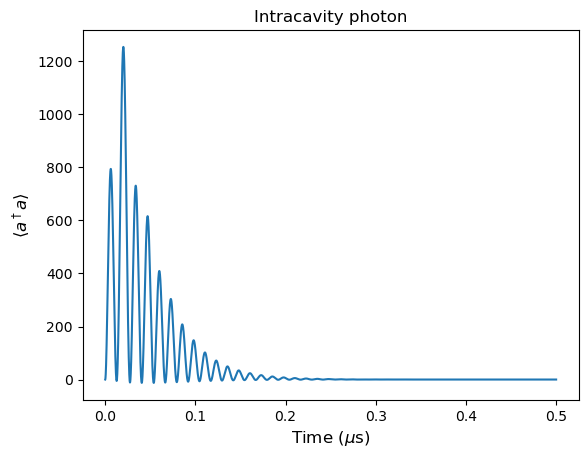

In [5]:
#############################################################
# Plots intracavity field
#############################################################
plt.plot(results[1][0], results[1][3])
plt.title("Intracavity photon", fontsize=12)
plt.xlabel(r"Time ($\mu$s)", fontsize=12)
plt.ylabel(r"$\langle a^\dagger a\rangle$", fontsize=12)

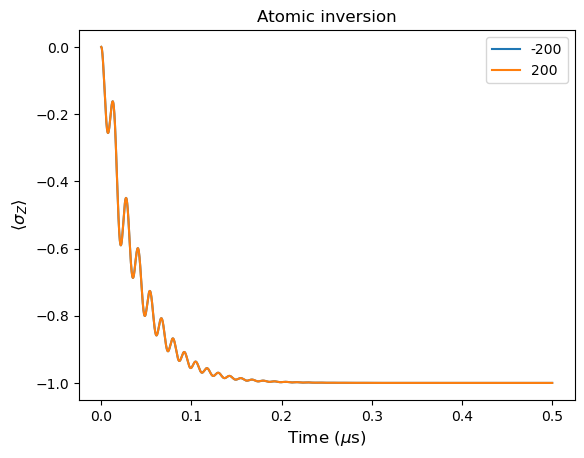

In [11]:
#############################################################
# Line plots for inversion and coherence
#############################################################
plt.plot(results[1][0], results[1][1], label=["-200","200"])
plt.title("Atomic inversion", fontsize=12)
plt.xlabel(r"Time ($\mu$s)", fontsize=12)
plt.ylabel(r"$\langle \sigma_Z \rangle$", fontsize=12)
plt.legend()

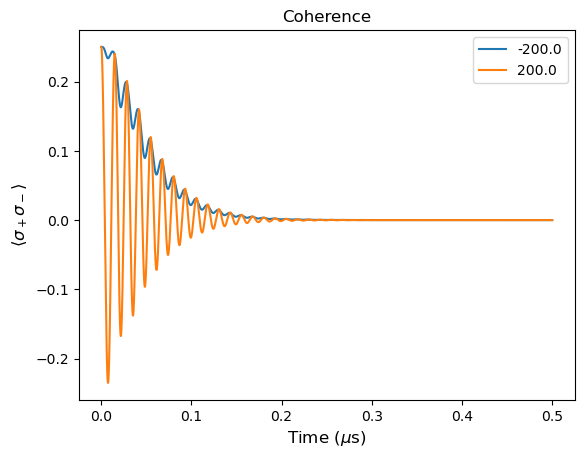

In [12]:
plt.plot(results[1][0], results[1][2], label=detunings[1])
plt.title("Coherence", fontsize=12)
plt.xlabel(r"Time ($\mu$s)", fontsize=12)
plt.ylabel(r"$\langle \sigma_+\sigma_- \rangle$", fontsize=12)
plt.legend()

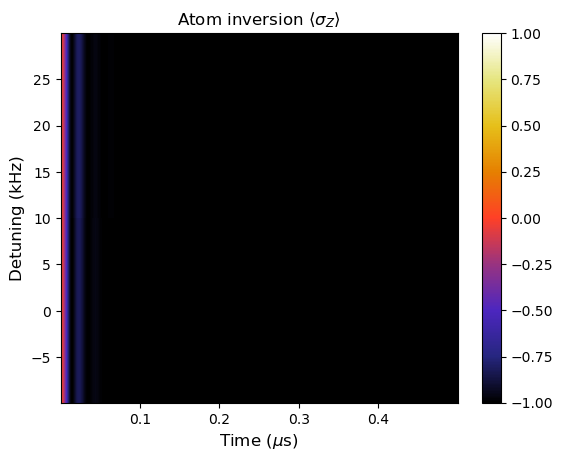

In [15]:
utils.plot_heat(results[0],detuning_values_1d[:20], np.rot90(results[1]), -1.0,1.0, 
                "Atom inversion $\langle\sigma_Z\\rangle$", "Time ($\mu$s)", "Detuning (kHz)")

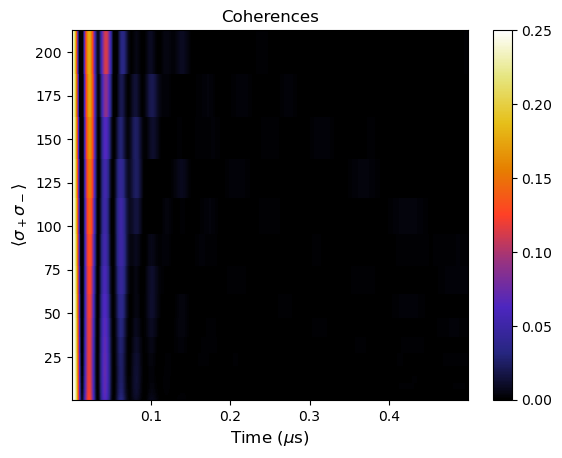

In [13]:
utils.plot_heat(results[0],detuning_values_1d, np.rot90(results[2]), 0,0.25, 
                "Coherences", "Time ($\mu$s)", "$\langle\sigma_+\sigma_-\\rangle$")

[[2 5]
 [1 4]
 [0 3]]


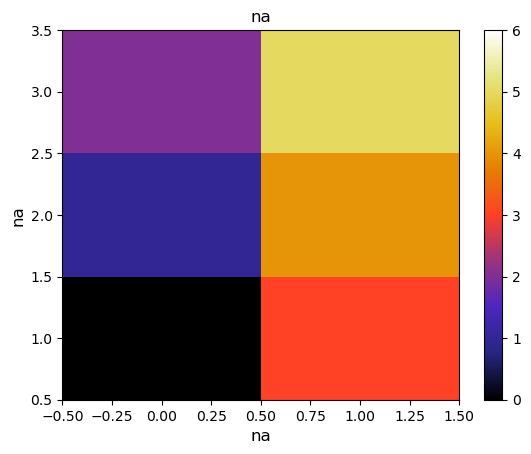

In [11]:

a = np.rot90(np.asarray([[0,1,2],[3,4,5]]))
print(a)
utils.plot_heat([0,1], [3,2,1], a, 0,6, "na", "na", "na")